In [20]:
from pathlib import Path
from tifffile import imread, imwrite
import numpy as np
import napari
from tqdm.notebook import tqdm
import pyclesperanto_prototype as cle
from stardist.matching import matching_dataset
from benchmark_instance import plot_performance, plot_stat_comparison

In [4]:
path_images = Path.home() / "Desktop/Code/CELLSEG_BENCHMARK/RESULTS/full data"
# pred_path = path_images / "processed/threshold_pred_SegResNet_Generalized_latest.tif" # 0.65
# pred_path = path_images / "processed/threshold_pred_Swin_Generalized_latest.tif" # 0.65
# pred_path = path_images / "processed/threshold_pred_TRAILMAP_DiceCE_best_metric.tif" # any ?
# pred_path = path_images / "processed/threshold_pred_VNet_Generalized_latest.tif" # 0.75
# pred_path = path_images / "processed/threshold_pred_WNet_latest.tif" # 0.65
results = path_images / "processed"
predictions = predictions = [imread(str(p)) for p in sorted(results.glob("*.tif"))]
pred_names = [p.name for p in sorted(results.glob("*.tif"))]
labels_path = path_images / "LABELS/relabel_gt.tif"

In [9]:
# pred_thresh = imread(pred_path)[:50,:,:]
# labels_gt = imread(labels_path)[:50,:,:]
labels_gt = imread(labels_path)

In [10]:
# voronoi_values = [0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.]
voronoi_values = [0.65, 0.65, 0.65, 0.75, 0.65]

In [7]:
vor_labels = []
for i, sigma in enumerate(voronoi_values):
    lab = np.array(cle.voronoi_otsu_labeling(predictions[i], spot_sigma=sigma, outline_sigma=sigma))
    vor_labels.append(lab)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

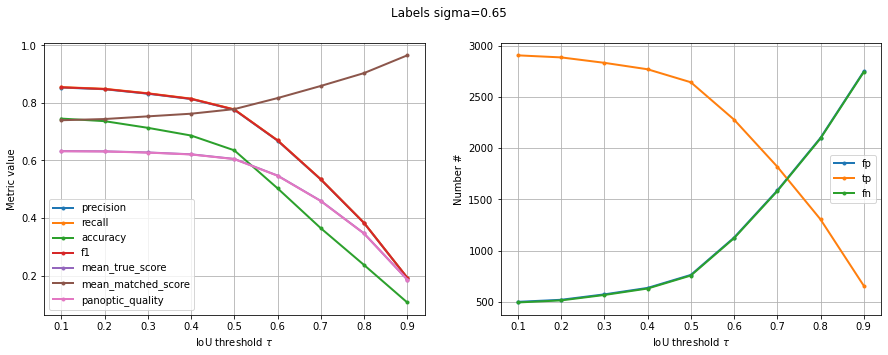

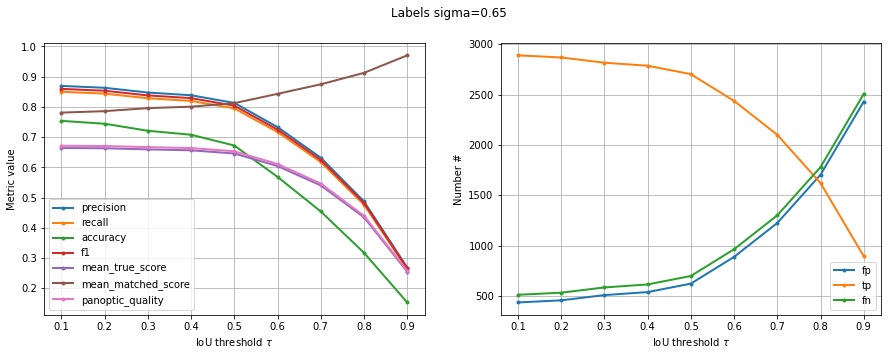

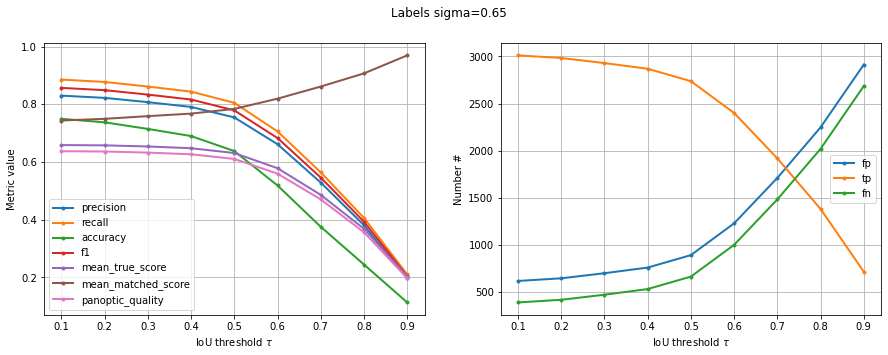

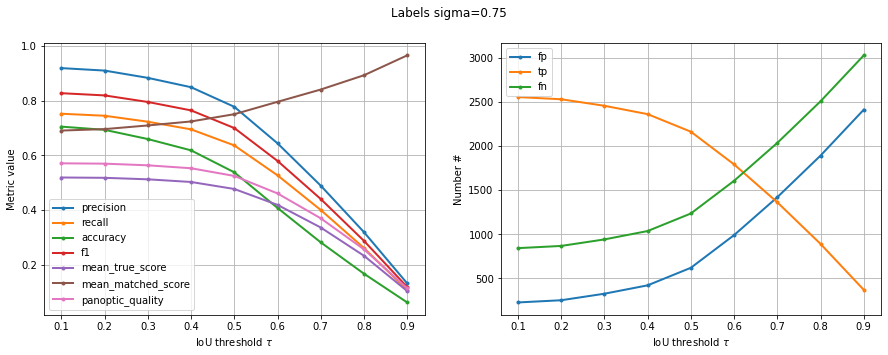

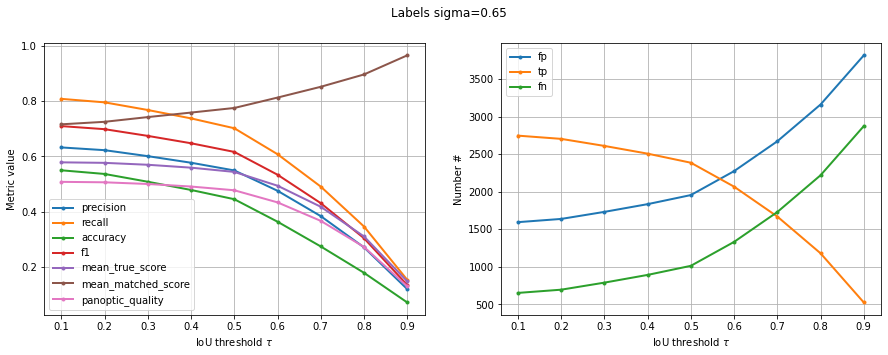

In [11]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
stats_labs = []
for i, p in enumerate(vor_labels):
    Y_val_pred = p
    stats = [matching_dataset(labels_gt, Y_val_pred, thresh=t, show_progress=False) for t in tqdm(taus)]
    stats_labs.append(stats)
    plot_performance(taus, stats, name=f"Labels sigma={voronoi_values[i]}")

In [12]:
# plot_stat_comparison(taus, stats_labs, [f"Sigma {voronoi_values[i]}" for i in range(len(voronoi_values))])

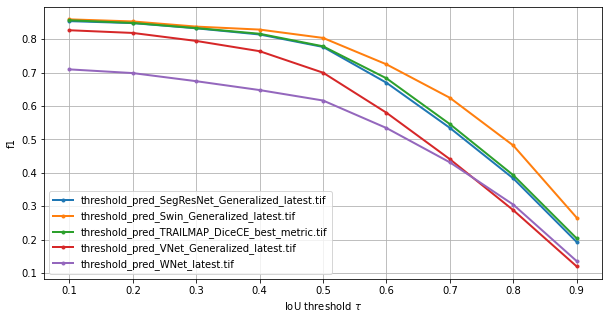

In [15]:
plot_stat_comparison(taus, stats_labs, [f"{pred_names[i]}" for i in range(len(voronoi_values))])

In [17]:
viewer = napari.viewer.Viewer()

In [19]:
for i, labs in enumerate(vor_labels):
    viewer.add_labels(labs, name=f"instance_{pred_names[i]}_sigma{voronoi_values[i]}")

In [24]:
for i, labs in enumerate(vor_labels):
    imwrite(
        path_images / f"instance/instance_sigma{voronoi_values[i]*100}_{pred_names[i]}",
        labs,
    )